In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
from scipy.io import wavfile

In [4]:
out_file = pd.read_excel('archive/BVC_Voice_Bio_Public.xlsx').set_index('New_ID')
out_file.head()

,Sex,Age,Ethnicity,Unnamed: 4,Unnamed: 5
New_ID,,,,,
4001,'Male',19,'Igbo',NaN,336
4002,'Male',23,'Igbo',NaN,190
4003,'Female',18,'Ikwerre',NaN,NaN
4004,'Male',23,'Annang',NaN,% Actual subjects = 526
4005,'Female',17,'Igbo',NaN,% Male subjects = 336


In [5]:
data = []
output = []
root = 'archive/multiple_sentences/multiple_sentences/'
file_names = os.listdir(root)

min_size = 100000000
for file in file_names:
    _, sample = wavfile.read(root + file)
    output.append(out_file.loc[int(file.split('_')[2]), ['Sex', 'Age', 'Ethnicity']])
    if min_size > sample.shape[0]:
        min_size = sample.shape[0]
    data.append(sample)

### The closest perfect square number will be used to clip the audio

In [6]:
size_data = int(min_size**0.5)**2

In [7]:


for i in range(len(data)):
    data[i] = np.concatenate([data[i][:size_data, 0], data[i][:size_data, 1]])

data = np.array(data)
output = np.array(output)

In [8]:
data.shape

(1778, 64082)

In [9]:
output.shape

(1778, 3)

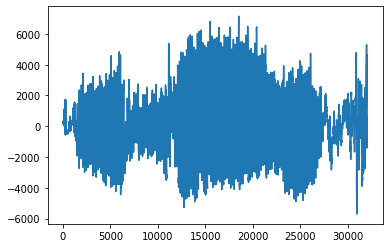

In [10]:
plt.plot(data[0, :size_data])
plt.show()

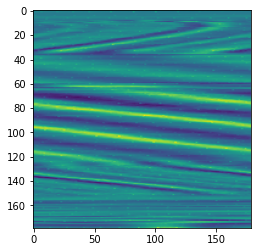

In [11]:
plt.imshow(data[0, :size_data].reshape(-1, int(size_data**0.5)))
plt.show()

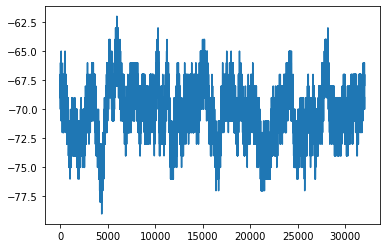

In [12]:
plt.plot(data[0, size_data:])
plt.show()

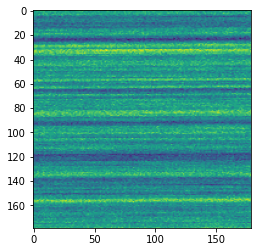

In [13]:
plt.imshow(data[0, size_data:].reshape(-1, int(size_data**0.5)))
plt.show()

### Now we will normalize the data

In [14]:
dict_unique_mci_category = dict(((b,a) for (a,b) in enumerate(set(output[:, 1]))))
dict_unique_mci_category_invert = {b:a for a,b in dict_unique_mci_category.items()}

In [19]:
data[0, :size_data].reshape(-1, 1)

array([[188, 179, 173, ..., 453, 575, 639]], dtype=int16)

/Users/ankushpandey/miniforge3/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


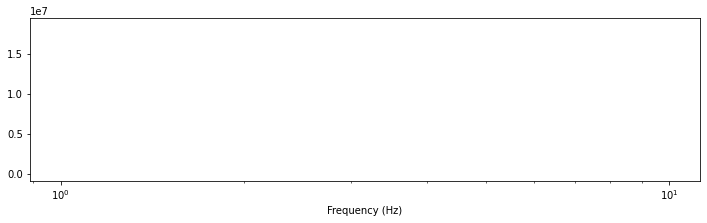

: 

In [21]:
import scipy
import numpy as np

# Applies fast fourier transformation to the signal and takes absolute values
y_freq = np.abs(np.fft.fft2(data[0, :size_data].reshape(-1, 1)))

# Establishes all possible frequency
# (dependent on the sampling rate and the length of the signal)
f = np.linspace(0, data[0, size_data:], len(y_freq))

# Plot audio signal as frequency information.
plt.figure(figsize=(12, 3))
plt.semilogx(f[: len(f) // 2], y_freq[: len(f) // 2])
plt.xlabel("Frequency (Hz)")
plt.show();